# Plot a final feature importance score for genes

#### Using CB_course file!!!

XGBoost used k-cross valudation with K=5, means there were 5 models, and for each of them we calculated feature score.
Here we sum them up to one score for all 5 models.

In [1]:
lib = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy'
import sys
sys.path.append(lib)
from utilities.package_importing import *
import scipy.stats as stats

Take 5 dfs and list the scores of genes:

In [2]:
FOLDER = r'C:\Users\KerenYlab\Desktop\Technion studies\courses\Cancer Bioinformatics - 066529\Final project\submission_CB\Results\Feature Importance\gene scores\activated T cells'


genes_dic = {}
for file in os.listdir(FOLDER):
    print(file)
    df = pd.read_csv(join(FOLDER, file))
    for gene in list(df.columns):
        genes_dic[gene] = genes_dic.get(gene, []) + [df[gene][0]]
        

k_importance_features_exp_78.csv
k_importance_features_exp_79.csv
k_importance_features_exp_80.csv
k_importance_features_exp_81.csv
k_importance_features_exp_82.csv
k_importance_features_exp_83.csv


final score of a gene is the sum of its scores:

In [3]:
for gene,scores in genes_dic.items():
    genes_dic[gene] = np.sum(scores)
    

In [4]:

scores_df = pd.DataFrame(list(genes_dic.items()), columns = ['Gene', 'Total feature importance score'])

<Figure size 7200x4000 with 0 Axes>

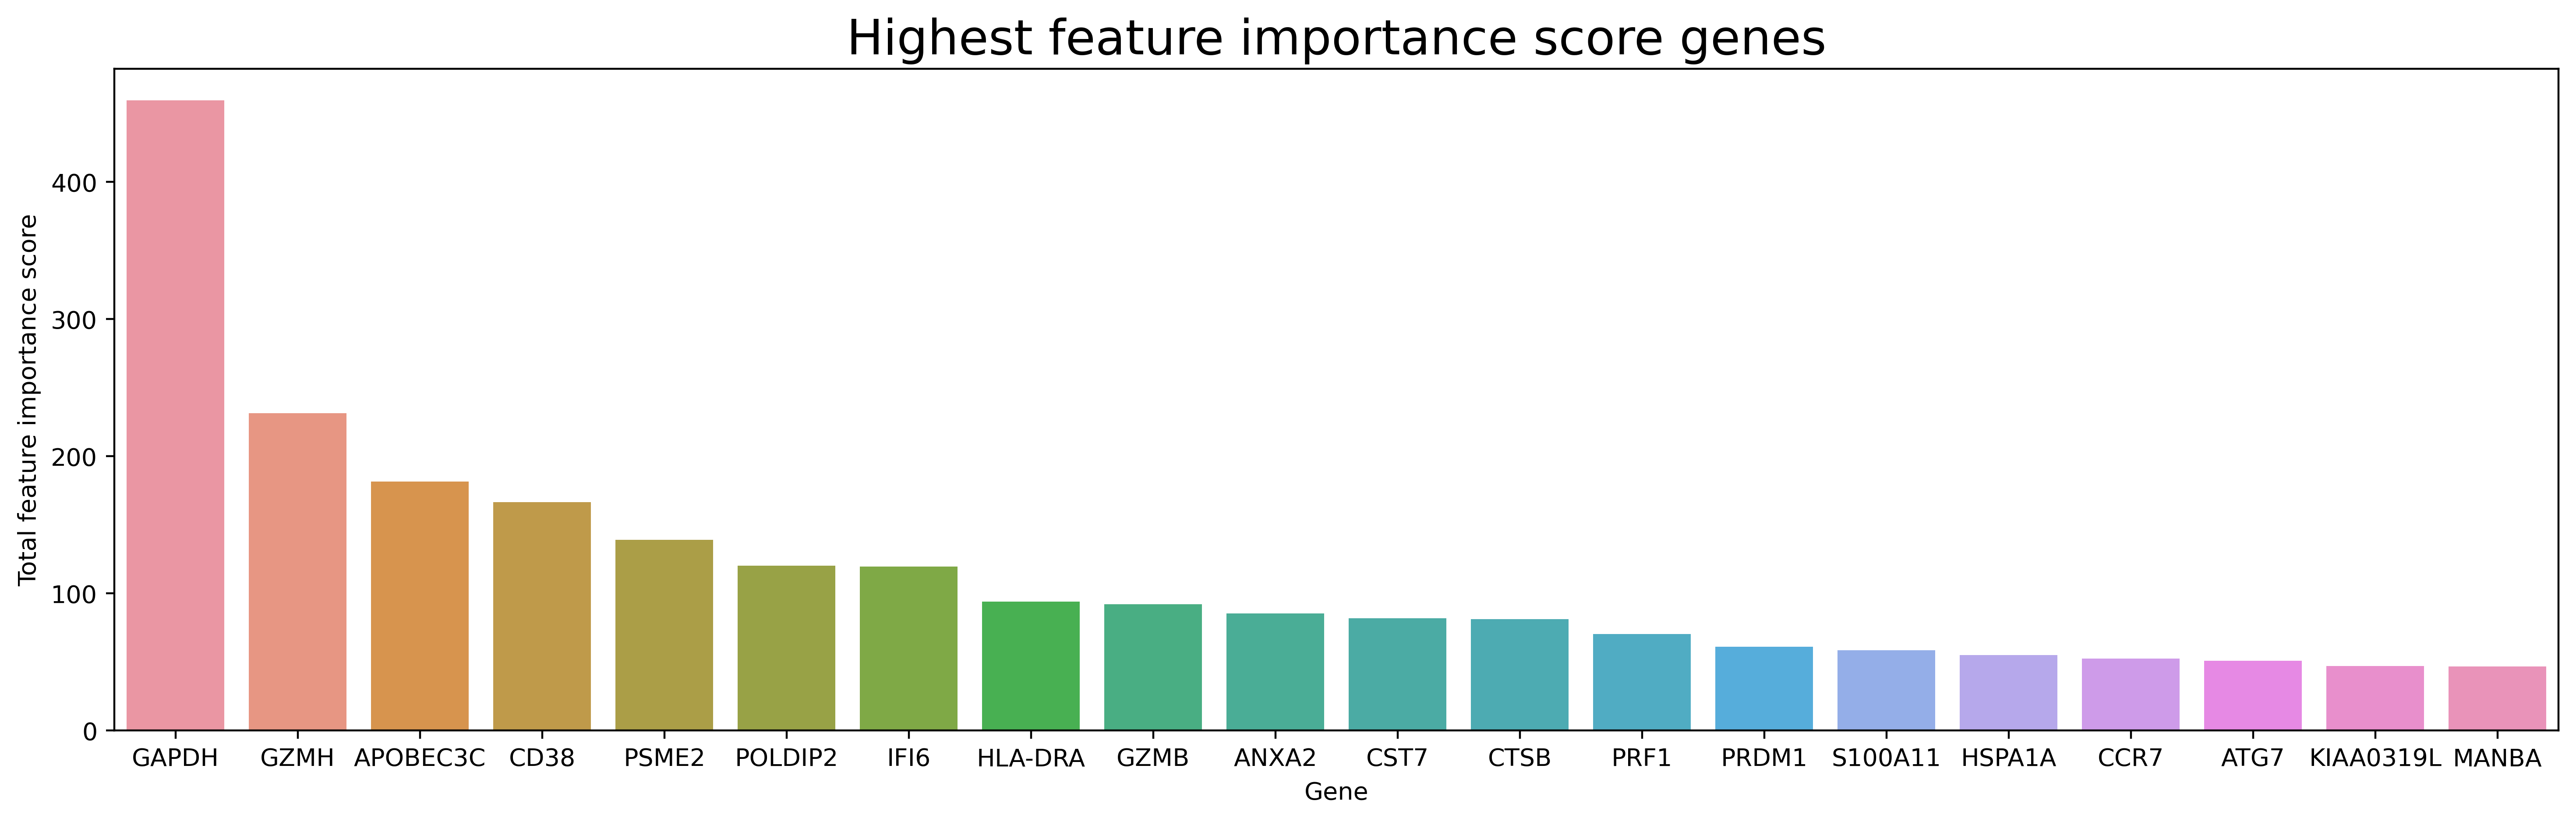

In [6]:
# plt.figure(figsize=(18, 10))
plt.figure(figsize=(18, 5))


g = sns.barplot(x='Gene', y='Total feature importance score', data=scores_df.sort_values('Total feature importance score', ascending=False).iloc[:20])
g.set_title(label='Highest feature importance score genes', fontsize = 20);

In [7]:
output_path =  r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\python_playground\outputs\XGBoost'
jpg_name = 'feature_importance_top_20_v2.jpg'
excel_name = 'feature_importance_top_20.xlsx'

g.get_figure().savefig(join(output_path, jpg_name))
scores_df.to_excel(join(output_path, excel_name))